In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
sns.set(
    font_scale = 2,
    style='whitegrid',
    rc={'figure.figsize':(20,7)}
)

In [4]:
sales_team  = pd.read_csv('../../../data/01_module/06_part/sales_team_6.csv')
order_leads = pd.read_csv('../../../data/01_module/06_part/order_leads_6.csv')

In [5]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [6]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [7]:
order_leads['Date'] = pd.to_datetime(order_leads['Date'])

In [10]:
order_leads.columns = order_leads.columns.str.lower().str.replace(' ', '_')
sales_team.columns = sales_team.columns.str.lower().str.replace(' ', '_')

In [19]:
order_leands_with_teams = order_leads.merge(right = sales_team,
                                            how   = 'left',
                                            on    = ['company_name', 'company_id']
)
order_leands_with_teams.head()

,order_id,company_id,company_name,date,order_value,converted,sales_rep,sales_rep_id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [ ]:
top_sales = order_leands_with_teams.groupby('sales_rep', as_index=False) \
    .agg({'converted': 'mean'}) \
    .sort_values(by='converted') \
    .tail(10)
top_sales

,sales_rep,converted
346,Nick Allen,0.298507
192,Jennifer Peck,0.304348
468,Thomas Lindsey,0.304348
187,Jason Miller,0.307692
455,Teddy Cook,0.315789
225,Jose Gaines,0.326087
249,Katie Rodriquez,0.333333
466,Thomas Fortner,0.352941
438,Sierra Garcia,0.363636
151,Ginger Wright,0.368421


In [38]:
all_sales = order_leands_with_teams.groupby('sales_rep', as_index=False) \
    .agg({'converted': 'mean'})

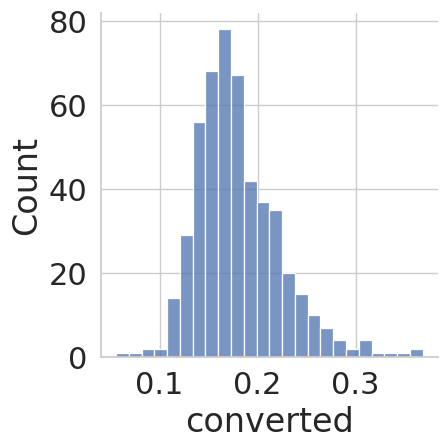

In [39]:
sns.displot(x=all_sales.converted, kde=False)

/tmp/ipykernel_20072/951546160.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_sales.sales_rep, rotation=45)


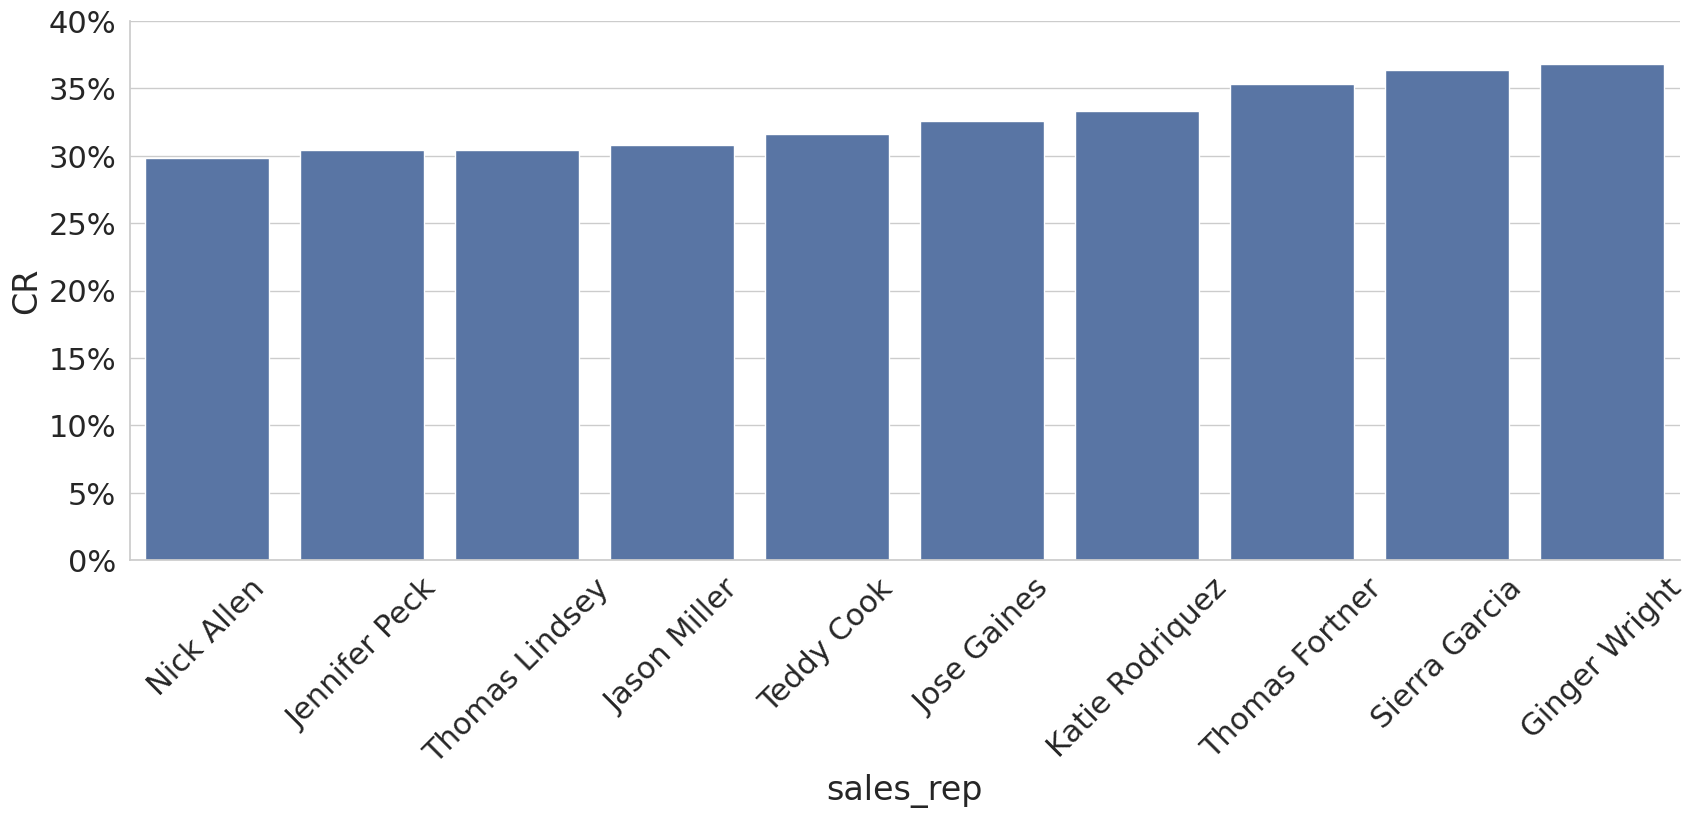

In [ ]:
ax = sns.barplot(data=top_sales, y='converted', x='sales_rep')
ax.set_xticklabels(top_sales.sales_rep, rotation=45)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

ax.set_ylabel('CR')
ax.set_xlabel('sales_rep')

sns.despine()

In [ ]:
cr_by_date = order_leads.groupby('date') \
    .agg({'converted': 'mean'}) \
    .rename(columns={'converted': 'CR'}) \
    .sort_values(by='date')

<Axes: xlabel='date'>

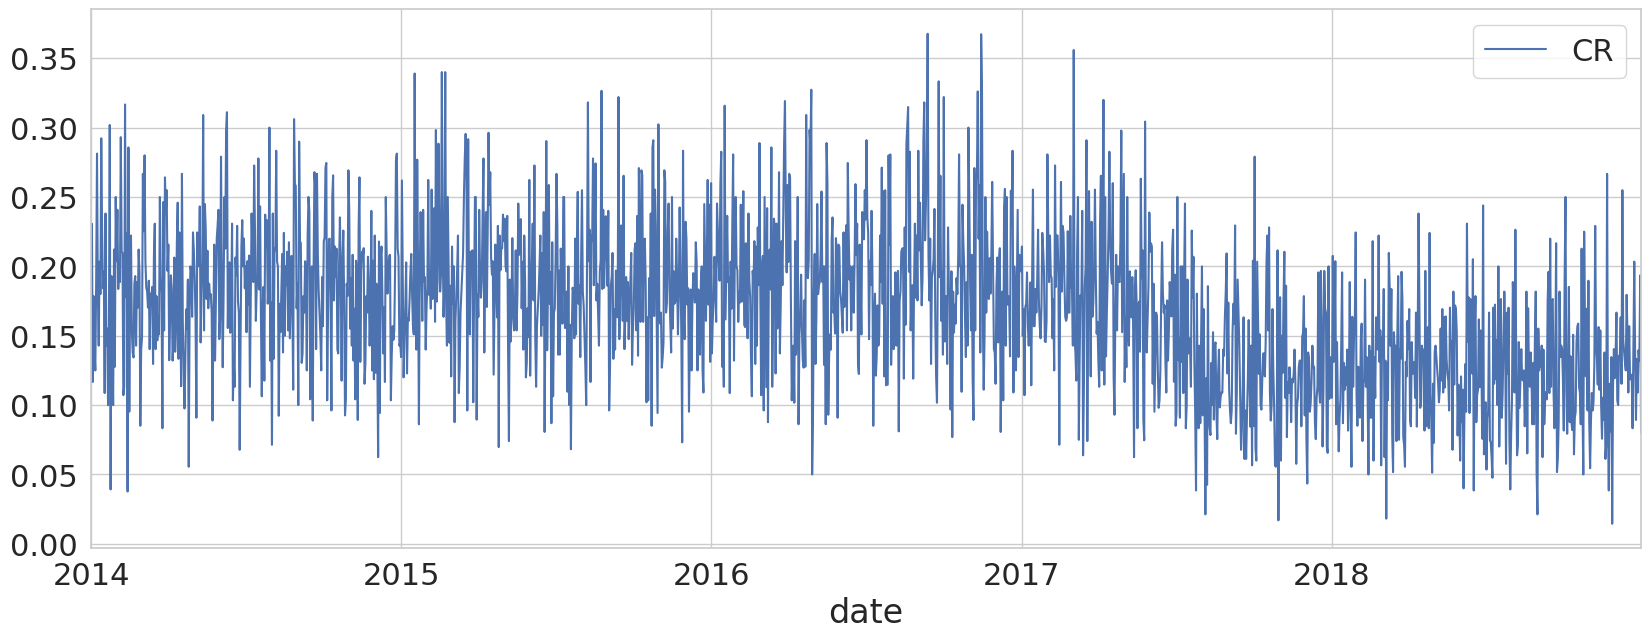

In [ ]:
cr_by_date.plot()

In [ ]:
cr_by_date_rolling = order_leads.groupby('date') \
    .agg({'converted': 'mean'}) \
    .rename(columns={'converted': 'CR'}) \
    .sort_values(by='date') \
    .rolling(30).mean()

In [ ]:
def get_plot(df, x_label, y_label, title):
    ax = df.plot()
    ax.set_title(title)
    ax.set_ylabel('Convertion rate\n')
    ax.set_xlabel('Date\n')
    
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{i:.0%}' for i in yticks])
    sns.despine()

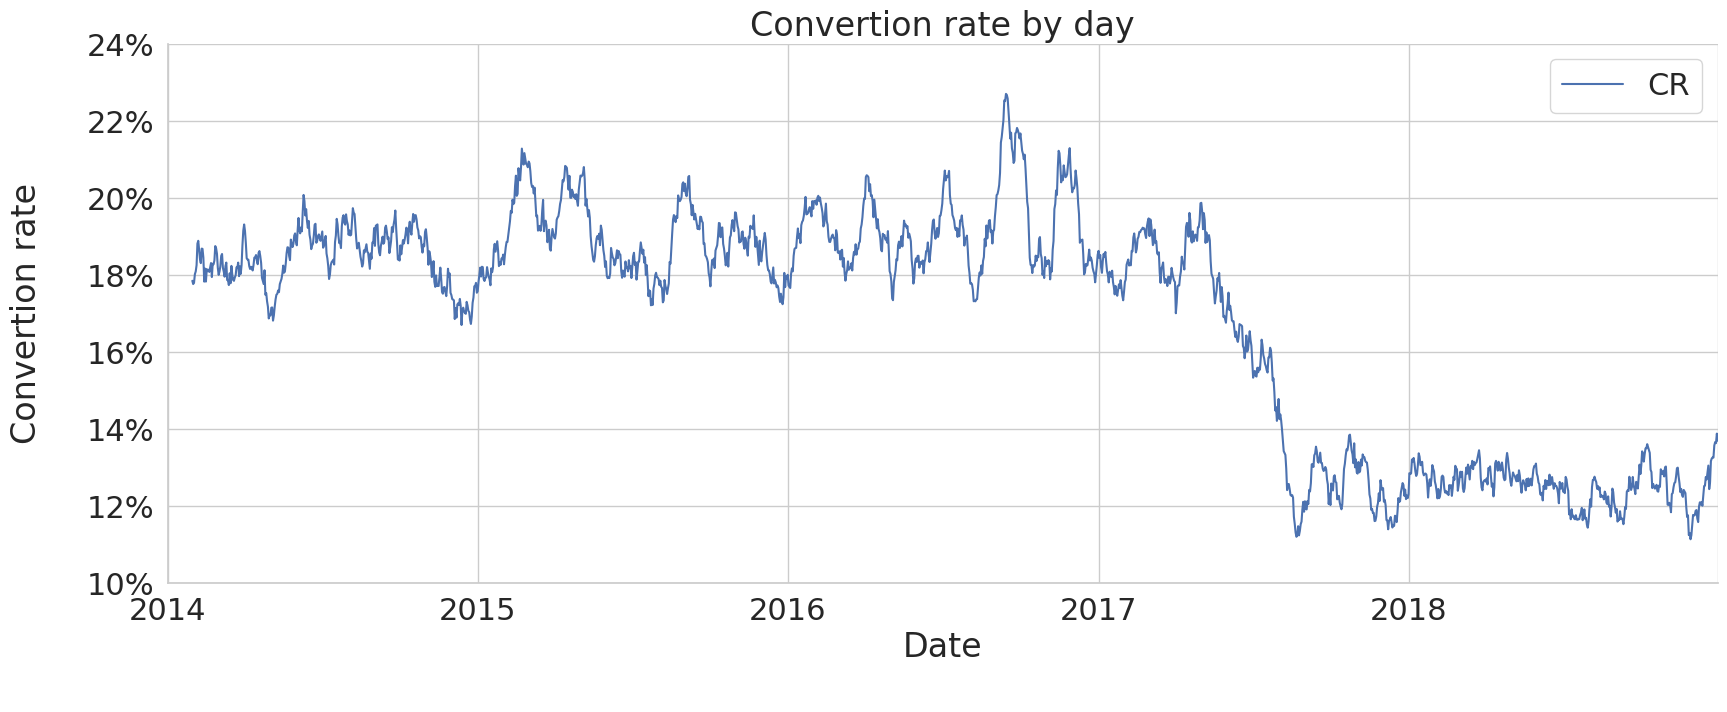

In [ ]:
get_plot(cr_by_date_rolling,'Date\n', 'Convertion rate\n', 'Convertion rate by day')

In [ ]:
cr_by_date_rolling_ = cr_by_date_rolling.reset_index().dropna()
cr_by_date_rolling_.head()

,date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944


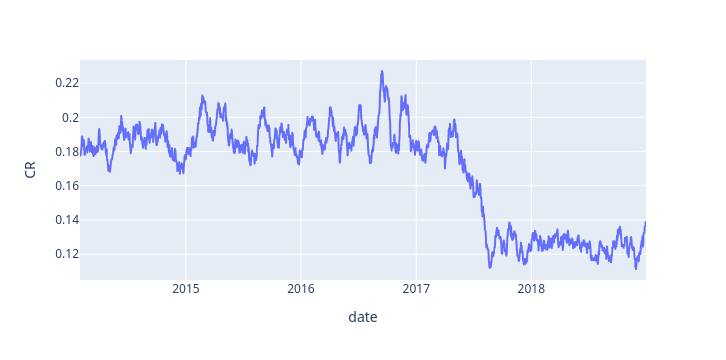

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(cr_by_date_rolling_, x="date", y="CR", title='')
fig.show()